In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [6]:
iris = datasets.load_iris()
X = iris.data                    # features
y = iris.target                  # classes: setosa, versicolor, virginica
feature_names = iris.feature_names
class_names = iris.target_names

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

K= 1  accuracy=0.967
K= 2  accuracy=0.933
K= 3  accuracy=0.933
K= 4  accuracy=0.933
K= 5  accuracy=0.933
K= 6  accuracy=0.933
K= 7  accuracy=0.967
K= 8  accuracy=0.933
K= 9  accuracy=0.967
K=10  accuracy=0.967
K=11  accuracy=0.967
K=12  accuracy=0.967
K=13  accuracy=0.967
K=14  accuracy=0.967
K=15  accuracy=0.967
K=16  accuracy=0.967
K=17  accuracy=0.967
K=18  accuracy=0.967
K=19  accuracy=0.967
K=20  accuracy=0.967

Best K (by test accuracy) = 1


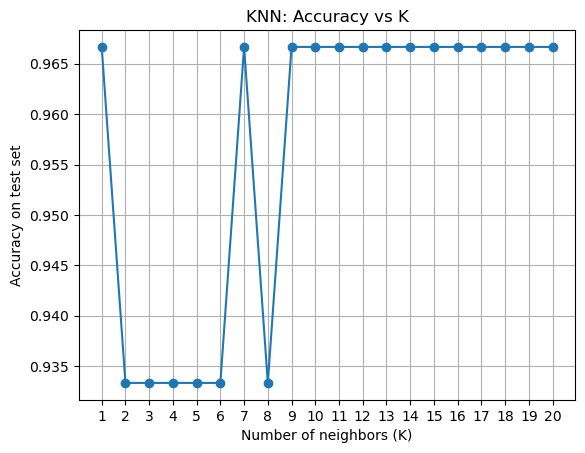

In [8]:
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k:2d}  accuracy={acc:.3f}")

best_k = k_values[int(np.argmax(accuracies))]
print(f"\nBest K (by test accuracy) = {best_k}")

# Plot: Accuracy vs K
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xticks(k_values)
plt.xlabel("Number of neighbors (K)")
plt.ylabel("Accuracy on test set")
plt.title("KNN: Accuracy vs K")
plt.grid(True)
plt.show()


Final accuracy with K=1: 0.967

Confusion matrix (rows=true, cols=pred):
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]] 

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



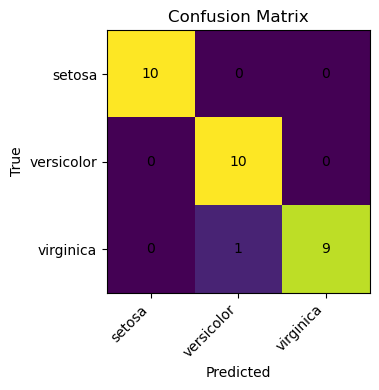

In [9]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nFinal accuracy with K={best_k}: {acc:.3f}\n")
print("Confusion matrix (rows=true, cols=pred):\n", cm, "\n")
print("Classification report:\n",
      classification_report(y_test, y_pred, target_names=class_names))

# Pretty confusion matrix plot
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm)
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.set_yticklabels(class_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

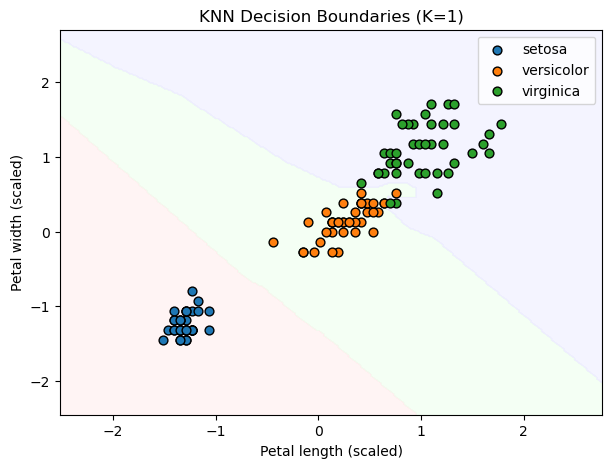

In [10]:
X2 = X[:, [2, 3]]  # select two features for 2D plot
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42, stratify=y
)

scaler2 = StandardScaler()
X2_train_s = scaler2.fit_transform(X2_train)
X2_test_s  = scaler2.transform(X2_test)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X2_train_s, y2_train)

# Create a grid over the feature space
h = 0.02
x_min, x_max = X2_train_s[:, 0].min() - 1, X2_train_s[:, 0].max() + 1
y_min, y_max = X2_train_s[:, 1].min() - 1, X2_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each grid point
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision regions + training points
plt.figure(figsize=(7,5))
cmap_light = ListedColormap(['#FFEEEE', '#EEFFEE', '#EEEEFF'])
plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_light)

for idx, cls in enumerate(class_names):
    plt.scatter(
        X2_train_s[y2_train == idx, 0],
        X2_train_s[y2_train == idx, 1],
        label=cls, s=40, edgecolor='k'
    )

plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.legend()
plt.show()